In [3]:
import io
import os
import sys
import csv
import math
import pickle
import decimal
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.font_manager as fm
import matplotlib.transforms as transforms

from collections import Counter

import seaborn as sns
import pandas as pd
import numpy as np

In [133]:
# read in the data
investments = pd.read_csv("data_for_app.csv")

# Create a dataframe from path_counts
df = investments.loc[:,["ticker", "vendorCreditRating", "value"]]
df = df.loc[df["value"] != 0]
df = df.set_index("ticker")
df["names"] = df.index

companies = {"AAA":0, "AA":0, "AA-":0, "A+":0, "A":0, "A-":0, "BBB+":0, "BBB":0, "BBB-":0, "BB+":0, "BB":0}
used_names = []
for row in df.iterrows():
    name = "".join(list(row[0]))
    score = "".join(list(row[1][0]))
    if score in companies and name not in used_names:
        companies.update({score:companies.get(score)+1})
        used_names.append(comp)

list_companies = list(zip(list(companies.keys()),list(companies.values())))
df = pd.DataFrame(list_companies, columns=["Ratings","Number"])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['DecimaMonoPro'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


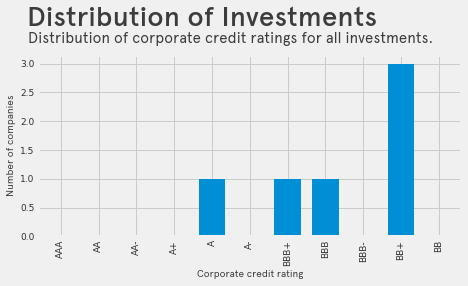

In [138]:
# x-axis
xaxis = "Ratings"

# y-axis
yaxis = "Number"
#yaxis = "col"

# ticks
tick_freq = 1

# bar width
bar_width = 0.7

# text
title_text = "Distribution of Investments"
subtitle_text = "Distribution of corporate credit ratings for all investments."
xlabel = "Corporate credit rating"
ylabel = "Number of companies"


# edges of plot in figure
top = 0.8
bottom = 0.17
left = 0.1
right = 0.94

# change title_pad to adjust xpos of title in pixels
# + is left, - is right
title_pad = 0 

# opacity
text_opacity = 0.75
xaxis_opacity = 0.7

# sizing
tick_label_size = 9
legend_size = 8
axis_label_size = 10
banner_text_size = 10

# import font
prop = fm.FontProperties(fname='DecimaMonoPro.ttf')
prop2 = fm.FontProperties(fname='apercu_medium_pro.otf')
prop3 = fm.FontProperties(fname='Apercu.ttf')
prop4 = fm.FontProperties(fname='Apercu.ttf', size=legend_size)

#================================================
# END OF PARAMETERS
#================================================

# figure initialization
fig, ax = plt.subplots(figsize=(7, 4))
plt.sca(ax)
style.use('fivethirtyeight')

#===PLOT===
graph = df.plot(x=xaxis,
                y=yaxis,
                ax=ax, 
                use_index=True, 
                legend=False,
                kind='bar',
                width = bar_width,
                color = '#008fd5')
    
# add axis labels
plt.xlabel(xlabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)
plt.ylabel(ylabel, 
           fontproperties=prop3, 
           fontsize = axis_label_size, 
           alpha=text_opacity)

# change font of legend
#L = graph.legend(prop={'size': legend_size})
#plt.setp(L.texts, fontproperties=prop4, alpha=text_opacity)

#plt.xticks(np.arange(math.ceil(start), math.ceil(end), 1.0))

# set size of tick labels
graph.tick_params(axis = 'both', 
                  which = 'major', 
                  labelsize = tick_label_size)

# set fontname for tick labels
for tick in graph.get_xticklabels():
    tick.set_fontname("DecimaMonoPro")
for tick in graph.get_yticklabels():
    tick.set_fontname("DecimaMonoPro")
    
# set color for tick labels
[t.set_color('#303030') for t in ax.xaxis.get_ticklabels()]
[t.set_color('#303030') for t in ax.yaxis.get_ticklabels()]

'''
# hide xticklabels
frame1 = plt.gca()
num_xlabels = len(frame1.axes.get_xticklabels())
i = 0
for xlabel_i in frame1.axes.get_xticklabels():
    if i % tick_freq != 0:
        xlabel_i.set_visible(False)
    i += 1

# create bolded x-axis
graph.axhline(y = 0, 
              color = 'black', 
              linewidth = 5, 
              alpha = xaxis_opacity)
'''

# transforms the x axis to figure fractions, and leaves y axis in pixels
xfig_trans = transforms.blended_transform_factory(fig.transFigure, transforms.IdentityTransform())
yfig_trans = transforms.blended_transform_factory(transforms.IdentityTransform(), fig.transFigure)

'''
# banner positioning
banner_y = math.ceil(banner_text_size * 0.6)

# banner text
banner = plt.annotate(banner_text, 
         xy=(0.02, banner_y), 
         xycoords=xfig_trans,
         fontsize = banner_text_size, 
         color = '#FFFFFF', 
         fontname='DecimaMonoPro')

# banner background height parameters
pad = 2 # points
bb= ax.get_window_extent()
h = bb.height/fig.dpi
height = ((banner.get_size()+2*pad)/72.)/h

# banner background
rect = plt.Rectangle((0,0), 
                     width=1, 
                     height=height,
                     transform=fig.transFigure, 
                     zorder=3,
                     fill=True, 
                     facecolor="grey", 
                     clip_on=False)
ax.add_patch(rect)
'''

#transform coordinate of left
display_left_tuple = xfig_trans.transform((left,0))
display_left = display_left_tuple[0]

# shift title
title_shift = math.floor(tick_label_size * 2.6)
title_shift += title_pad

# title
graph.text(x = display_left - title_shift, y = 0.9, 
           transform = yfig_trans,
           s = title_text,
           fontproperties = prop2,
           weight = 'bold', 
           fontsize = 28,
           alpha = text_opacity)

# subtitle, +1 accounts for font size difference in title and subtitle
graph.text(x = display_left - title_shift + 1, y = 0.84, 
           transform = yfig_trans,
           s = subtitle_text,
           fontproperties=prop3,
           fontsize = 15, 
           alpha = text_opacity)

# adjust position of subplot in figure
plt.subplots_adjust(top=top)
plt.subplots_adjust(bottom=bottom)
plt.subplots_adjust(left=left)
plt.subplots_adjust(right=right)

# save to .svg
plt.savefig("bar_chart.svg", dpi=500)